---
# Lecture notes - Support Vector Machine (SVM)
---

This is the lecture note for **SVM**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to SVM. I encourage you to read further about SVM. </p>

Read more:

- [Stödvektormaskin wikipedia](https://sv.wikipedia.org/wiki/St%C3%B6dvektormaskin)
- [Support vector machine wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)
- [Kernel trick wikipedia](https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick)
- [SVM sklearn theory](https://scikit-learn.org/stable/modules/svm.html)
- [Support vector classifier sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [SVM machine learning mastery](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)
---

# Support vector machines (SVM)

Simulating data

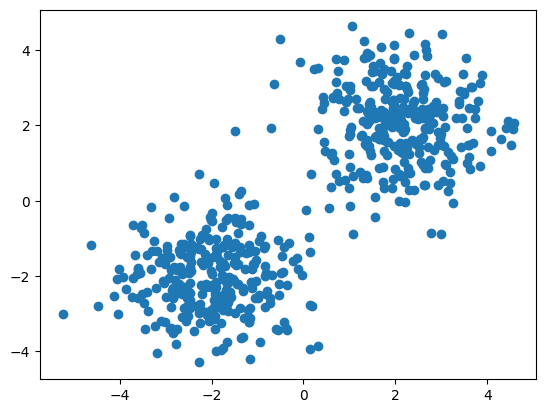

In [20]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# centers tvingar att det ska vara två kluster på de sättet som de är uppställt
blobs = make_blobs([300, 300], 2, random_state=42, centers= [(-2,-2), (2,2)])
blobs_data = blobs[0]
blobs_labels = blobs[1]

# blobs[0] is the data
# blobs[1] is the labels
# blobs[0], blobs[1]

plt.scatter(blobs_data[:,0], blobs_data[:,1])

## Generate labels

- we can generate labels by using an unsupervised learning algorithm 
- KMeans with two clusters 

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np

blobs_with_label = np.c_[blobs_data, blobs_labels]
blobs_with_label

array([[-1.77590752, -1.9874076 ,  0.        ],
       [ 1.9803622 ,  2.55248995,  1.        ],
       [-2.81822068,  0.09238728,  0.        ],
       ...,
       [ 4.40341559,  1.9423812 ,  1.        ],
       [ 0.65181458,  2.74326409,  1.        ],
       [ 1.07676675,  0.64831539,  1.        ]])

<Axes: xlabel='X1', ylabel='X2'>

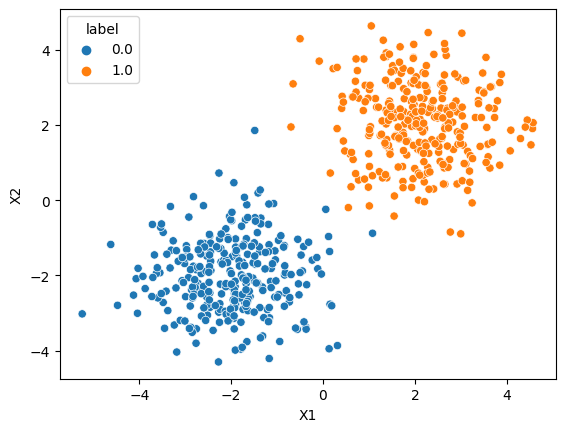

In [25]:
df = pd.DataFrame(blobs_with_label, columns=['X1', 'X2', 'label'])
sns.scatterplot(data=df, x='X1', y='X2', hue='label')


In [28]:
X, y = blobs_data, blobs_labels
X[:5]

array([[-1.77590752, -1.9874076 ],
       [ 1.9803622 ,  2.55248995],
       [-2.81822068,  0.09238728],
       [ 2.78580016,  2.42545756],
       [-2.24896415, -1.02842905]])

In [29]:
y[:5]

array([0, 1, 0, 1, 0])

---
## Support Vector Machines (SVM)

We start with the history from maximum margin classifier to support vector classifier to support vector machine.

---
### Maximum Margin Classifier (MMC)
If the data is perfectly linearly separable with a hyperplane, then there exists infinite amount of hyperplanes that satisfies this as there are infinite amount of small tilts, rotations to a hyperplane. However the optimal hyperplane is the hyperplane in which it is farthest from the training observations is called **maximumm margin classifier**. In maximum margin classifier:

- the closest points from each class to the hyperplane are called support vectors, the margin is constructed with the help of these support vectors 
- there are no misclassifications in training data, the data are in the correct side of the line
- the variance is high and bias low, as it doesn't allow any misclassifications in training data. This can cause overfitting.
- sensitive to individual observation, as one training point could be a different support vector, which causes hyperplane to be very different
- the magnitude of the distance of observation to hyperplane is a measure of confidence that the observation is correctly classified

Mathematically MMC can be constructed as:

$$\max_{\beta_0, \beta_1, \ldots, \beta_p, M} M$$
$$\text{s.t.}$$
$$ \sum_{j=1}^p \beta_j^2=1$$
$$y_i(\beta_0+\beta_1x_{i1}+\ldots+\beta_px_{ip}) \ge M, \forall i= 1,\ldots, n$$

This means that the parameters $\beta_0, \beta_1, \ldots, \beta_p$ is chosen to construct the margins $M$ to the hyperplane, in which to maximize $M$.

---
### Soft Margin Classifier or Support Vector Classifier (SVC)

- allows for some misclassifications, which gives greater robustness to individual observations
- better classification of most training observations

Mathematically 

$$\max_{\beta_0, \beta_1, \ldots, \beta_p, \epsilon_1,\ldots, \epsilon_n, M}{M}$$
$$\text{s.t.}$$
$$ \sum_{j=1}^p \beta_j^2=1$$
$$y_i(\beta_0+\beta_1x_{i1}+\ldots+\beta_px_{ip}) \ge M(1-\epsilon_i)$$
$$\sum_{i=1}^n \epsilon_i \le C$$

where, $\epsilon_i \ge 0, i = {1,\ldots, n}$ are slack variables that allows individual variable $i$ th to be on wrong side of margin or hyperplane, $C \ge 0$ is the tuning parameter. $C$ bounds the sum of $\epsilon_i$, which determines the severity of violations to the margin. Small $C$ gives high variance, low bias and large $C$ gives high bias and low variance. The larger the $C$, the more support vectors we have to determine the hyperplane. In scikit-learn $C$ is a regularization parameter that is $\propto 1/C$, so you have to think opposite to the theory.

---
### Support vector machines (SVM)

There are many cases where the data is not linearly separable with a hyperplane, and thus SVC won't work. A solution is to enlarge the feature space as in polynomial linear regression. In SVM we enlarge the feature space using kernels to accomodate non-linear boundaries between classes. With some linear algebra it can be shown that an observation can be classified as:

$$f(x) = \beta_0 + \sum_{i\in\mathcal{S}} \alpha_i\langle x,x_i\rangle$$

where $\langle x, x_i \rangle$ is an inner product and we can let the kernel $K(x_i, x_{i'}) = \sum_{i\in\mathcal{S}} \alpha_i\langle x_i,x_{i'}\rangle$ be a measurement of similarity between two observations. Note that by changing the kernel $K(x_i, x_{i'})$ we can enlarge the feature space so that we can separate observations with hyperplanes linearly in high dimension, but projected down to two dimensions it can have a non-linear decision boundary. This is called the kernel trick and is computationally cheap. Example of different kernels that can be used are linear, polynomial, radial basis functions.

## SVM
Linear kernel

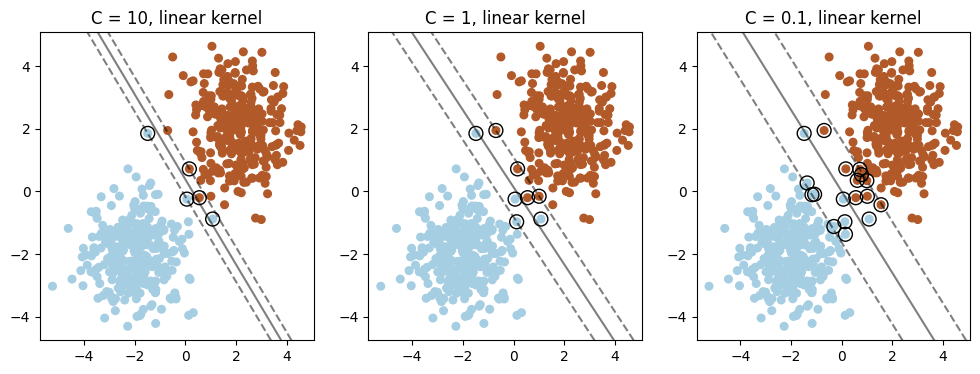

In [40]:
from utils import plot_svm_margins
from sklearn.svm import SVC # Support Vector Classifier

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# C är vår regulaseringsparameter(budget)- den som gör att vi får softare margin (more soft)
# C motsvarar 1/C i SKLEARN
# C is regularization (budget) parameter - makes margin more soft
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="linear", C=C), X, y)
    plt.title(f"C = {C}, linear kernel")

### Radial basis kernel

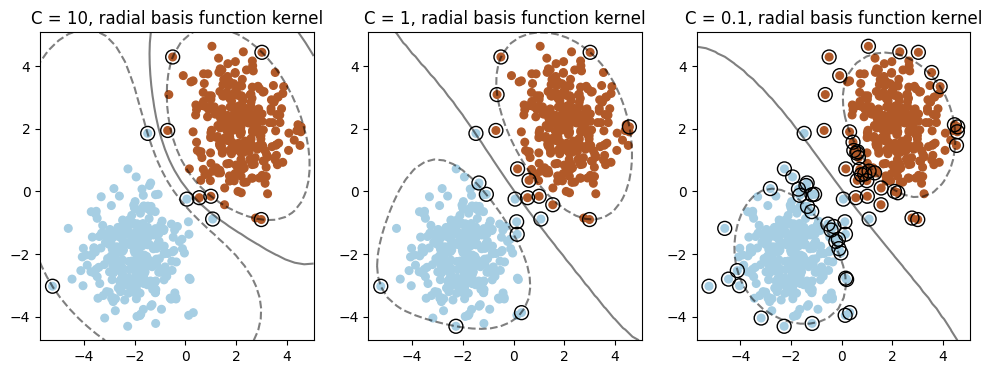

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# C is regularization (budget) parameter - makes margin more soft
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="rbf", C=C), X, y)
    plt.title(f"C = {C}, radial basis function kernel")

# Polynomial kernel

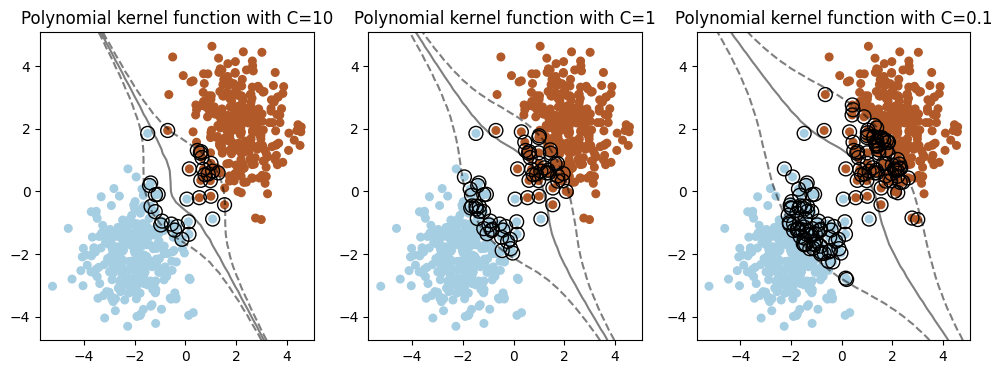

In [44]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

# C is a regularization parameter inversely proportional to C in theory
for i, C in enumerate([10, 1, .1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="poly", C=C, degree=3), X, y)
    ax[i-1].set(title=f"Polynomial kernel function with C={C}")

# Sigmoid kernel

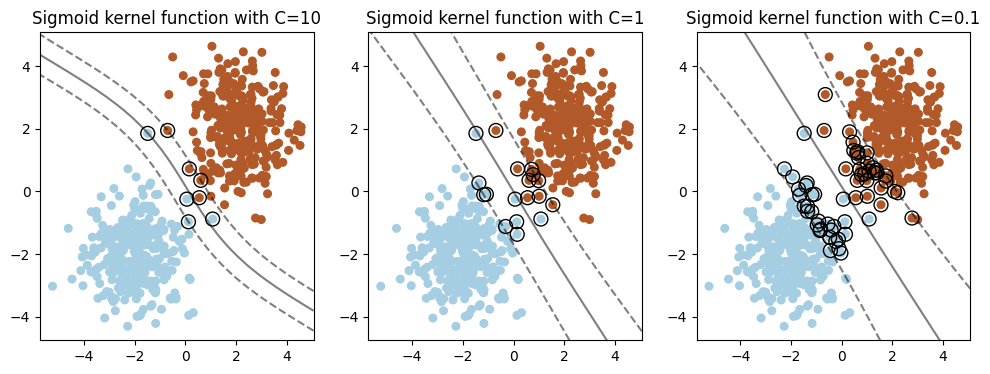

In [45]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

# C is a regularization parameter inversely proportional to C in theory
for i, C in enumerate([10, 1, .1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="sigmoid", C=C), X, y)
    ax[i-1].set(title=f"Sigmoid kernel function with C={C}")